In [1]:
from __future__ import print_function
import numpy as np
import warnings
import pandas as pd 
import matplotlib.pyplot as plt
import os
import keras
!pip install keras_applications
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from tensorflow.keras.utils import get_source_inputs 
from tensorflow.python.keras.utils import layer_utils 
from tensorflow.python.keras.utils.data_utils import get_file
from keras import backend as K
from tensorflow.keras.optimizers import RMSprop

from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from tensorflow.keras.utils import get_source_inputs

2024-11-04 05:34:20.174186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 05:34:20.174298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 05:34:20.309351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.8 MB/s eta 0:00:00


In [2]:
def VGGupdated(input_tensor=None,classes=6):    
   
    img_rows, img_cols = 150, 150   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

 # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)
    
     # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [3]:
model = VGGupdated(classes = 2) 
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

PATH = '/kaggle/input/hms-harmful-brain-activity-classification'
dataset_path = os.listdir(PATH)

folders = os.listdir(PATH)
print (folders)  #what kinds of files are in this dataset

print("No. of Files/Folders found: ", len(dataset_path))

['train_eegs', 'sample_submission.csv', 'train_spectrograms', 'test_eegs', 'example_figures', 'test_spectrograms', 'train.csv', 'test.csv']
No. of Files/Folders found:  8


In [5]:
df = pd.read_csv(PATH+"/train.csv")

In [6]:
# Let's check how many samples for each category are present
print("Total number of data in the dataset: ", len(df))

data_count = df['expert_consensus'].value_counts()

print("expert_consensus data in each category: ")
print(data_count)

Total number of data in the dataset:  106800
expert_consensus data in each category: 
expert_consensus
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: count, dtype: int64


In [7]:
df = df.drop(columns=['eeg_sub_id', 'eeg_label_offset_seconds', "spectrogram_sub_id", "spectrogram_label_offset_seconds","label_id",])
df=df.drop_duplicates(subset=("spectrogram_id"))
data_count = df['expert_consensus'].value_counts()

print("expert_consensus data in each category: ")
print(data_count)

expert_consensus data in each category: 
expert_consensus
Other      4699
Seizure    2045
GRDA       1422
LPD        1284
GPD        1025
LRDA        663
Name: count, dtype: int64


In [8]:
df.replace({'GRDA':'NO'}, inplace=True)
df.replace({'Other':'NO'}, inplace=True)
df.replace({'GPD':'NO'}, inplace=True)
df.replace({'LRDA':'NO'}, inplace=True)
df.replace({'LPD':'NO'}, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y = df['expert_consensus'].values

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[1 0 0 ... 0 0 0]


In [10]:
# Assuming y is our target variable as a 1D array or DataFrame column
y = y.reshape(-1, 1)  # Reshape to column vector 
# Create OneHotEncoder object with specified categories
onehotencoder = OneHotEncoder(categories='auto')  # 'auto' automatically determines categories
Y = onehotencoder.fit_transform(y).toarray()
print(Y.shape)  # This should print the shape of the one-hot encoded output


(11138, 2)


In [11]:
# Load spectrogram data from Parquet file
ecg_spectrogram = pd.read_parquet(PATH+'/train_spectrograms/353733.parquet')

In [12]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Resizing and Preprocessing Spectrogram Images
def preprocess_spectrogram(spectrogram, target_size=(150, 150)):
    # Normalizing spectrogram data to [0, 255] range 
    if spectrogram.dtype == np.float64:
        spectrogram = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min()) * 255.0
        spectrogram = spectrogram.astype(np.uint8)

    # Resize spectrogram to target size using OpenCV
    resized_spectrogram = cv2.resize(spectrogram, target_size)
    # Convert to RGB image (3 channels)
    rgb_spectrogram = cv2.cvtColor(resized_spectrogram, cv2.COLOR_GRAY2RGB)
    # Convert to array and preprocess according to VGG-16 requirements
    preprocessed_spectrogram = img_to_array(rgb_spectrogram)
    preprocessed_spectrogram = preprocess_input(preprocessed_spectrogram)
    return preprocessed_spectrogram

# Preprocess first spectrogram in the DataFrame
first_spectrogram = ecg_spectrogram.iloc[0, :].values  #each row represents a spectrogram
preprocessed_spectrogram = preprocess_spectrogram(first_spectrogram)
print(preprocessed_spectrogram.shape)

(150, 150, 3)


In [13]:
import os
path='/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/'
images=[]
# Ignore all the warnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for f in os.listdir(path):
        file_path=path+f
        df = pd.read_parquet(file_path)
        first_spectrogram = df.iloc[0, :].values  # Assuming each row represents a spectrogram
        preprocessed_spectrogram = preprocess_spectrogram(first_spectrogram)
        images.append(preprocessed_spectrogram)

In [14]:
images = np.array(images)
images.shape

(11138, 150, 150, 3)

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=42)

#inspect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(8910, 150, 150, 3)
(8910, 2)
(2228, 150, 150, 3)
(2228, 2)


In [16]:
hist = model.fit(train_x, train_y, epochs=100,validation_split=0.2, verbose=2)

Epoch 1/100


2024-11-04 05:43:21.713218: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.18794, expected 3.54228
2024-11-04 05:43:21.713273: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.14647, expected 4.50081
2024-11-04 05:43:21.713282: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.30074, expected 4.65509
2024-11-04 05:43:21.713290: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 4.91575, expected 4.27009
2024-11-04 05:43:21.713298: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 3.57367, expected 2.92801
2024-11-04 05:43:21.713305: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 4.05899, expected 3.41334
2024-11-04 05:43:21.713313: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 5.27592, expected 4.63026
2024-11-04 05:43:21.713320: E external/local_xla/xla

223/223 - 76s - 340ms/step - accuracy: 0.8027 - loss: 40.1562 - val_accuracy: 0.8103 - val_loss: 0.4972
Epoch 2/100


W0000 00:00:1730699071.906533      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


223/223 - 26s - 119ms/step - accuracy: 0.7748 - loss: 1.2273 - val_accuracy: 0.8193 - val_loss: 0.5812
Epoch 3/100
223/223 - 41s - 184ms/step - accuracy: 0.8060 - loss: 1.0468 - val_accuracy: 0.8193 - val_loss: 84.5713
Epoch 4/100
223/223 - 27s - 119ms/step - accuracy: 0.8086 - loss: 23229.6543 - val_accuracy: 0.8193 - val_loss: 13152.2471
Epoch 5/100
223/223 - 27s - 119ms/step - accuracy: 0.7814 - loss: 8916.8828 - val_accuracy: 0.8193 - val_loss: 740470.8125
Epoch 6/100
223/223 - 27s - 119ms/step - accuracy: 0.7609 - loss: 102523.9141 - val_accuracy: 0.8193 - val_loss: 158264.8125
Epoch 7/100
223/223 - 26s - 119ms/step - accuracy: 0.7924 - loss: 128945264.0000 - val_accuracy: 0.6914 - val_loss: 478246784.0000
Epoch 8/100
223/223 - 26s - 119ms/step - accuracy: 0.7493 - loss: 112277.4766 - val_accuracy: 0.8193 - val_loss: 840780.4375
Epoch 9/100
223/223 - 26s - 119ms/step - accuracy: 0.7847 - loss: 501581.9688 - val_accuracy: 0.8193 - val_loss: 0.5037
Epoch 10/100
223/223 - 41s - 184ms

In [17]:
from sklearn.metrics import confusion_matrix
#Predictions on the test set
pred_y = model.predict(test_x)

 7/70 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step

W0000 00:00:1730702031.361328      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


69/70 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

2024-11-04 06:33:53.989395: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22500: 4.05562, expected 3.31202
2024-11-04 06:33:53.989460: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22501: 5.54755, expected 4.80395
2024-11-04 06:33:53.989474: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22502: 5.65566, expected 4.91206
2024-11-04 06:33:53.989486: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22503: 5.19665, expected 4.45304
2024-11-04 06:33:53.989504: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22504: 5.57293, expected 4.82933
2024-11-04 06:33:53.989516: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22505: 5.45659, expected 4.71299
2024-11-04 06:33:53.989526: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 22507: 6.10612, expected 5.36251
2024-11-04 06:33:53.989537:

70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step


W0000 00:00:1730702039.949464      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [18]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8282 - loss: 0.4601
Loss = 0.46865910291671753
Test Accuracy = 0.8222621083259583


W0000 00:00:1730702044.527674      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_y.argmax(axis=1), pred_y.argmax(axis=1), average='weighted')
recall = recall_score(test_y.argmax(axis=1),pred_y.argmax(axis=1), average='weighted')
f1 = f1_score(test_y.argmax(axis=1),pred_y.argmax(axis=1), average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.676114991506822
Recall: 0.822262118491921
F1 Score: 0.7420611827966499


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
cm = confusion_matrix(test_y.argmax(axis=1), pred_y.argmax(axis=1))

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1832    0]
 [ 396    0]]


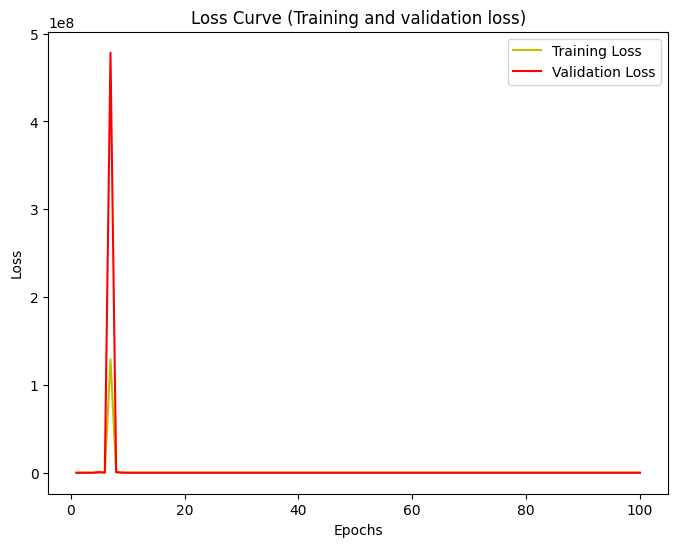

In [21]:
# Plot the training and validation loss at each epoch
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(8, 6))  
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Curve (Training and validation loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

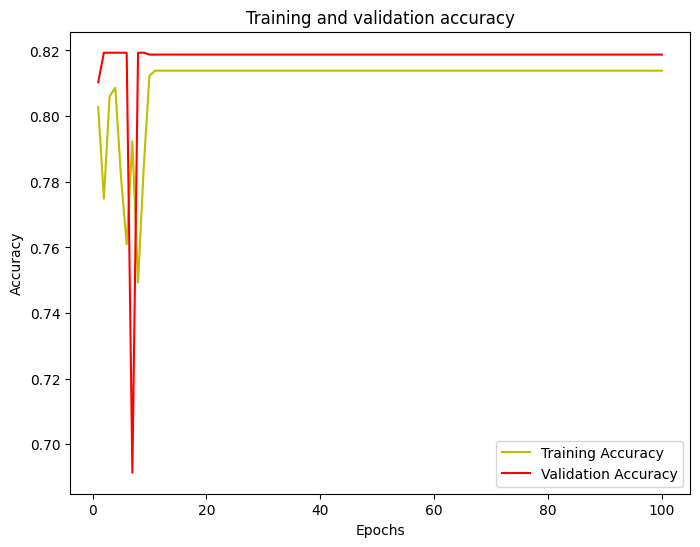

In [22]:
# Plot the training and validation accuracy at each epoch
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
from keras.applications import EfficientNetV2B0
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [24]:
# Define EfficientNetV2 model
efficientnet_base = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

# Adding GlobalAveragePooling and Dense layers
x = efficientnet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(2, activation='softmax')(x)  # Assuming binary classification

# Creating the EfficientNetV2 model
efficientnet_model = Model(inputs=efficientnet_base.input, outputs=x)


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
# Compile EfficientNetV2 model
efficientnet_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
# Train EfficientNetV2 model
efficientnet_history = efficientnet_model.fit(train_x, train_y, epochs=100, validation_split=0.2, verbose=2)


Epoch 1/100
223/223 - 192s - 862ms/step - accuracy: 0.8004 - loss: 0.5374 - val_accuracy: 0.8193 - val_loss: 0.4897
Epoch 2/100
223/223 - 14s - 65ms/step - accuracy: 0.8137 - loss: 0.4984 - val_accuracy: 0.8193 - val_loss: 0.4852
Epoch 3/100
223/223 - 14s - 65ms/step - accuracy: 0.8137 - loss: 0.4885 - val_accuracy: 0.8193 - val_loss: 0.4919
Epoch 4/100
223/223 - 14s - 65ms/step - accuracy: 0.8137 - loss: 0.4852 - val_accuracy: 0.8193 - val_loss: 0.4813
Epoch 5/100
223/223 - 20s - 92ms/step - accuracy: 0.8136 - loss: 0.4829 - val_accuracy: 0.8193 - val_loss: 0.4772
Epoch 6/100
223/223 - 14s - 65ms/step - accuracy: 0.8137 - loss: 0.4831 - val_accuracy: 0.8193 - val_loss: 0.4796
Epoch 7/100
223/223 - 21s - 92ms/step - accuracy: 0.8134 - loss: 0.4819 - val_accuracy: 0.8193 - val_loss: 0.4780
Epoch 8/100
223/223 - 14s - 65ms/step - accuracy: 0.8138 - loss: 0.4784 - val_accuracy: 0.8193 - val_loss: 0.4814
Epoch 9/100
223/223 - 15s - 65ms/step - accuracy: 0.8144 - loss: 0.4750 - val_accuracy

In [27]:
# Evaluate EfficientNetV2 model
efficientnet_preds = efficientnet_model.evaluate(test_x, test_y)
print("EfficientNetV2 Loss =", efficientnet_preds[0])
print("EfficientNetV2 Test Accuracy =", efficientnet_preds[1])


70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.7552 - loss: 1.2922
EfficientNetV2 Loss = 1.37852942943573
EfficientNetV2 Test Accuracy = 0.7446140050888062


In [28]:
# Make predictions and calculate metrics
efficientnet_pred_y = efficientnet_model.predict(test_x)

efficientnet_precision = precision_score(test_y.argmax(axis=1), efficientnet_pred_y.argmax(axis=1), average='weighted')
efficientnet_recall = recall_score(test_y.argmax(axis=1), efficientnet_pred_y.argmax(axis=1), average='weighted')
efficientnet_f1 = f1_score(test_y.argmax(axis=1), efficientnet_pred_y.argmax(axis=1), average='weighted')

print("EfficientNetV2 Precision:", efficientnet_precision)
print("EfficientNetV2 Recall:", efficientnet_recall)
print("EfficientNetV2 F1 Score:", efficientnet_f1)


70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step
EfficientNetV2 Precision: 0.7106469527209648
EfficientNetV2 Recall: 0.7446140035906643
EfficientNetV2 F1 Score: 0.7260520779251035


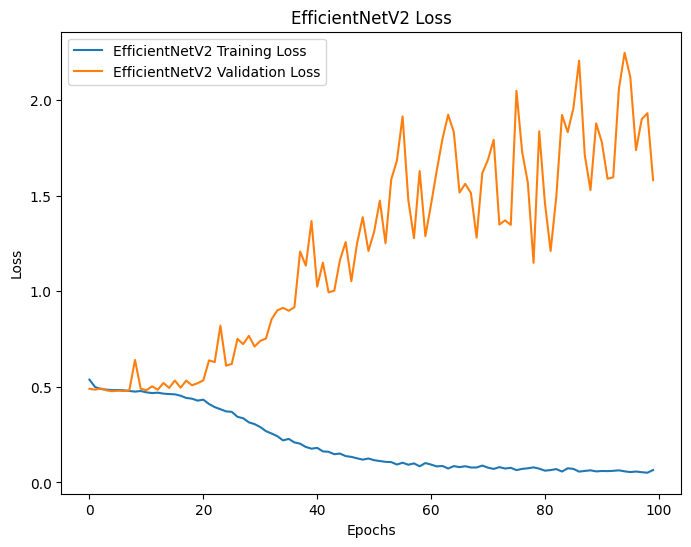

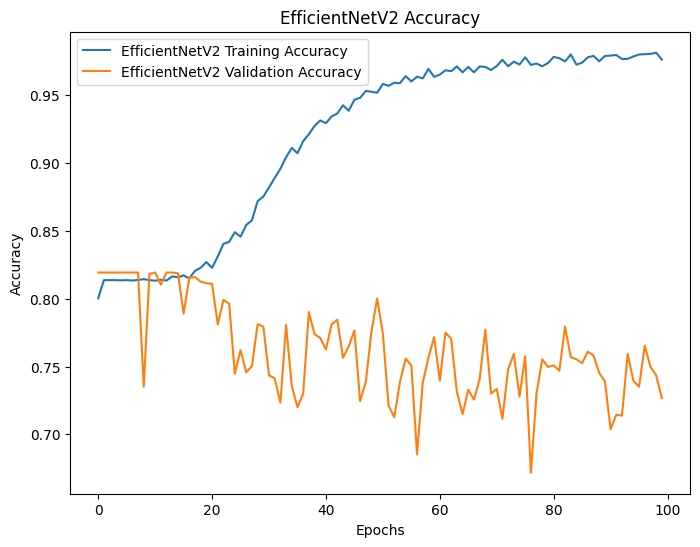

In [29]:
# Plot loss curve
plt.figure(figsize=(8, 6))
plt.plot(efficientnet_history.history['loss'], label='EfficientNetV2 Training Loss')
plt.plot(efficientnet_history.history['val_loss'], label='EfficientNetV2 Validation Loss')
plt.title('EfficientNetV2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(efficientnet_history.history['accuracy'], label='EfficientNetV2 Training Accuracy')
plt.plot(efficientnet_history.history['val_accuracy'], label='EfficientNetV2 Validation Accuracy')
plt.title('EfficientNetV2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


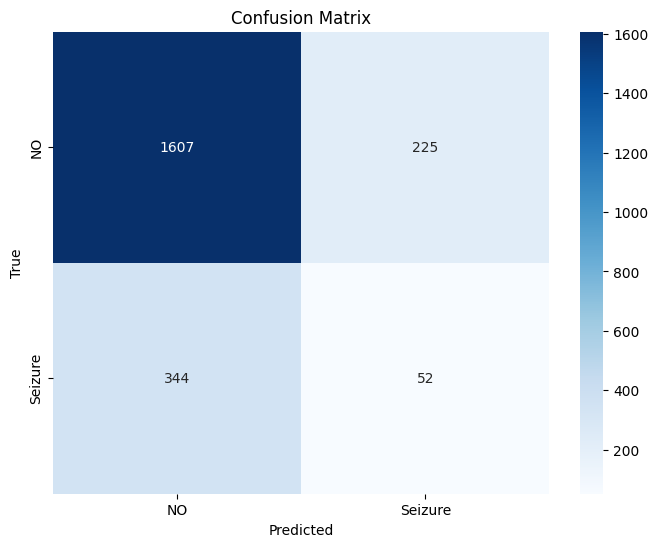

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(test_y.argmax(axis=1), efficientnet_pred_y.argmax(axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_labelencoder.classes_, yticklabels=y_labelencoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [31]:
# Gather results
results = {
    'Model': ['VGG', 'EfficientNetV2'],
    'Test Loss': [preds[0], efficientnet_preds[0]],
    'Test Accuracy': [preds[1], efficientnet_preds[1]],
    'Precision': [precision, efficientnet_precision],
    'Recall': [recall, efficientnet_recall],
    'F1 Score': [f1, efficientnet_f1]
}

results_df = pd.DataFrame(results)
print(results_df)


            Model  Test Loss  Test Accuracy  Precision    Recall  F1 Score
0             VGG   0.468659       0.822262   0.676115  0.822262  0.742061
1  EfficientNetV2   1.378529       0.744614   0.710647  0.744614  0.726052


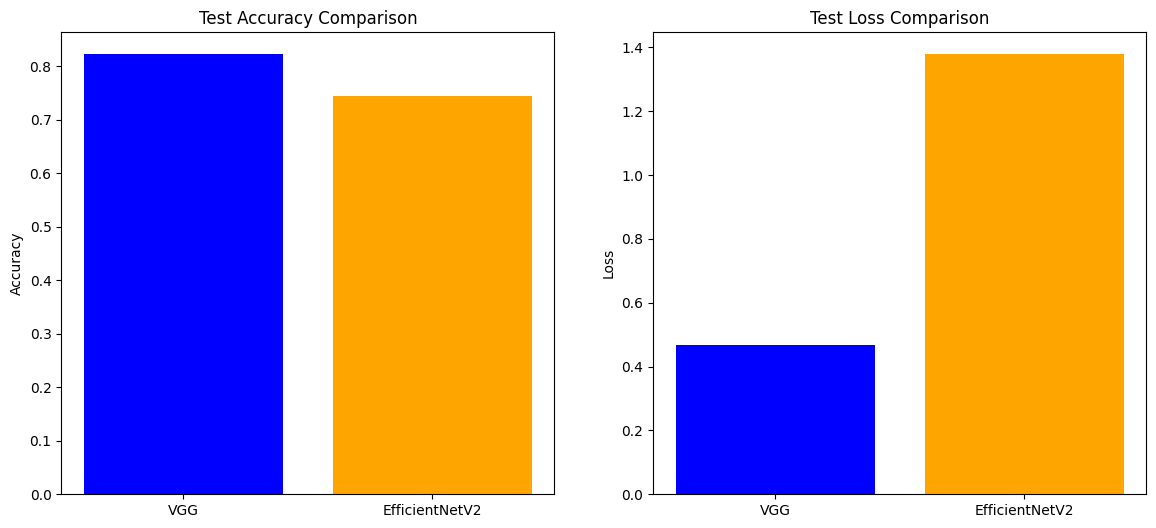

In [32]:
# Plot comparison of Test Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy
ax[0].bar(results_df['Model'], results_df['Test Accuracy'], color=['blue', 'orange'])
ax[0].set_title('Test Accuracy Comparison')
ax[0].set_ylabel('Accuracy')

# Loss
ax[1].bar(results_df['Model'], results_df['Test Loss'], color=['blue', 'orange'])
ax[1].set_title('Test Loss Comparison')
ax[1].set_ylabel('Loss')

plt.show()


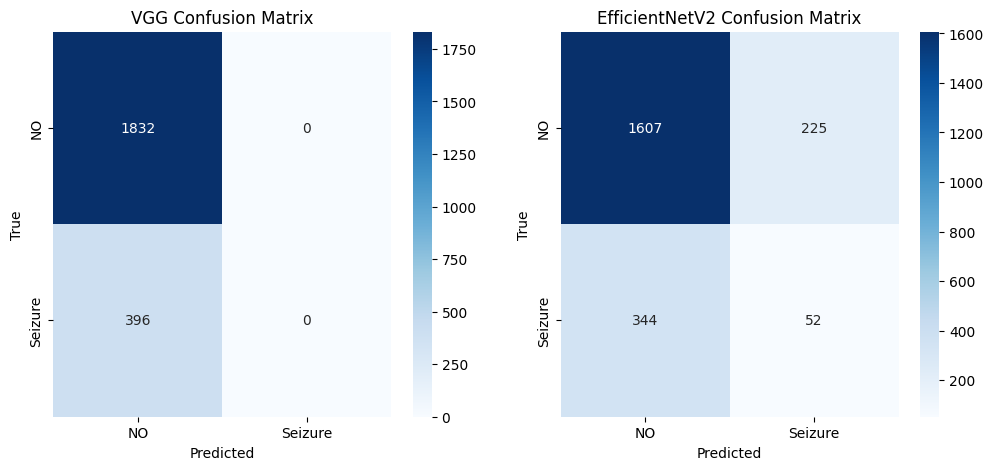

In [33]:
# Confusion matrices for both models
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# VGG Confusion Matrix
cm_vgg = confusion_matrix(test_y.argmax(axis=1), pred_y.argmax(axis=1))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Blues', ax=ax[0], xticklabels=y_labelencoder.classes_, yticklabels=y_labelencoder.classes_)
ax[0].set_title('VGG Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# EfficientNetV2 Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[1], xticklabels=y_labelencoder.classes_, yticklabels=y_labelencoder.classes_)
ax[1].set_title('EfficientNetV2 Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()


In [34]:
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load the VGG19 model
def VGG19_model(input_shape=(150, 150, 3), num_classes=6):
    # Load the VGG19 model without the top classification layers
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

    # Add custom classification layers on top of VGG19
    x = Flatten(name='flatten')(base_model.output)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

    # Create the model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the VGG19 base model layers (optional)
    for layer in base_model.layers:
        layer.trainable = False

    return model


In [35]:
# Compile the VGG19 model
vgg19_model = VGG19_model(input_shape=(150, 150, 3), num_classes=2)  # Change num_classes if needed
vgg19_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
# Train the model
hist_vgg19 = vgg19_model.fit(train_x, train_y, epochs=100, validation_split=0.2, verbose=2)



Epoch 1/100


W0000 00:00:1730703789.794631      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1730703801.210714      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1730703803.261617      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


223/223 - 19s - 85ms/step - accuracy: 0.7736 - loss: 9.9914 - val_accuracy: 0.7738 - val_loss: 0.5504
Epoch 2/100


W0000 00:00:1730703806.113321      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


223/223 - 13s - 58ms/step - accuracy: 0.7999 - loss: 0.5543 - val_accuracy: 0.8019 - val_loss: 0.5985
Epoch 3/100
223/223 - 13s - 58ms/step - accuracy: 0.7908 - loss: 0.6002 - val_accuracy: 0.8187 - val_loss: 0.6144
Epoch 4/100
223/223 - 13s - 58ms/step - accuracy: 0.7915 - loss: 0.6384 - val_accuracy: 0.6431 - val_loss: 1.9870
Epoch 5/100
223/223 - 13s - 58ms/step - accuracy: 0.7964 - loss: 2.8383 - val_accuracy: 0.8103 - val_loss: 2.3189
Epoch 6/100
223/223 - 13s - 58ms/step - accuracy: 0.7974 - loss: 0.6904 - val_accuracy: 0.7873 - val_loss: 0.5621
Epoch 7/100
223/223 - 13s - 58ms/step - accuracy: 0.8105 - loss: 0.5398 - val_accuracy: 0.8193 - val_loss: 0.6302
Epoch 8/100
223/223 - 13s - 58ms/step - accuracy: 0.8071 - loss: 0.6857 - val_accuracy: 0.4658 - val_loss: 0.9021
Epoch 9/100
223/223 - 13s - 58ms/step - accuracy: 0.7978 - loss: 0.8247 - val_accuracy: 0.8159 - val_loss: 0.8178
Epoch 10/100
223/223 - 13s - 58ms/step - accuracy: 0.8072 - loss: 0.8747 - val_accuracy: 0.8109 - va

In [37]:
# Evaluate the VGG19 model
vgg19_pred_y = vgg19_model.predict(test_x)
vgg19_preds = vgg19_model.evaluate(test_x, test_y)
print("VGG19 Loss =", vgg19_preds[0])
print("VGG19 Test Accuracy =", vgg19_preds[1])

# Calculate precision, recall, and F1 score for VGG19
vgg19_precision = precision_score(test_y.argmax(axis=1), vgg19_pred_y.argmax(axis=1), average='weighted')
vgg19_recall = recall_score(test_y.argmax(axis=1), vgg19_pred_y.argmax(axis=1), average='weighted')
vgg19_f1 = f1_score(test_y.argmax(axis=1), vgg19_pred_y.argmax(axis=1), average='weighted')

print("VGG19 Precision:", vgg19_precision)
print("VGG19 Recall:", vgg19_recall)
print("VGG19 F1 Score:", vgg19_f1)


 5/70 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step

W0000 00:00:1730705215.768541      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step


W0000 00:00:1730705219.080731      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8282 - loss: 1.3249
VGG19 Loss = 1.0360629558563232
VGG19 Test Accuracy = 0.8222621083259583
VGG19 Precision: 0.676114991506822
VGG19 Recall: 0.822262118491921
VGG19 F1 Score: 0.7420611827966499


W0000 00:00:1730705224.036976      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Confusion matrix for VGG19
cm_vgg19 = confusion_matrix(test_y.argmax(axis=1), vgg19_pred_y.argmax(axis=1))
print("VGG19 Confusion Matrix:")
print(cm_vgg19)



VGG19 Confusion Matrix:
[[1832    0]
 [ 396    0]]


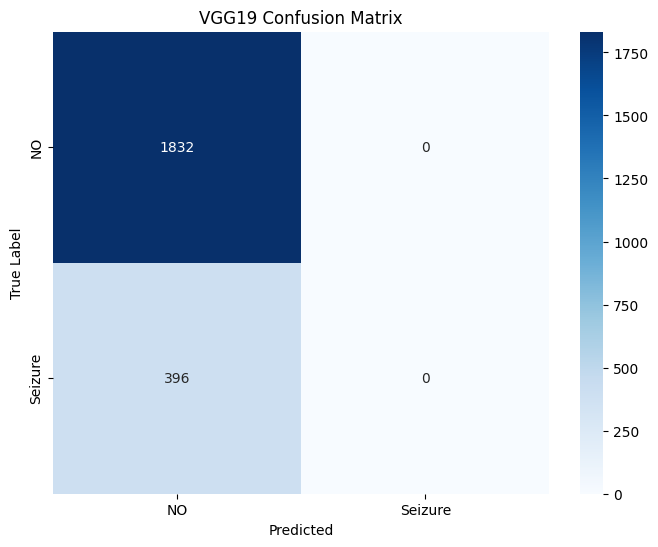

In [39]:
import seaborn as sns  # Add this line

# Plot confusion matrix for VGG19
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg19, annot=True, fmt='d', cmap='Blues', xticklabels=y_labelencoder.classes_, yticklabels=y_labelencoder.classes_)
plt.title('VGG19 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()


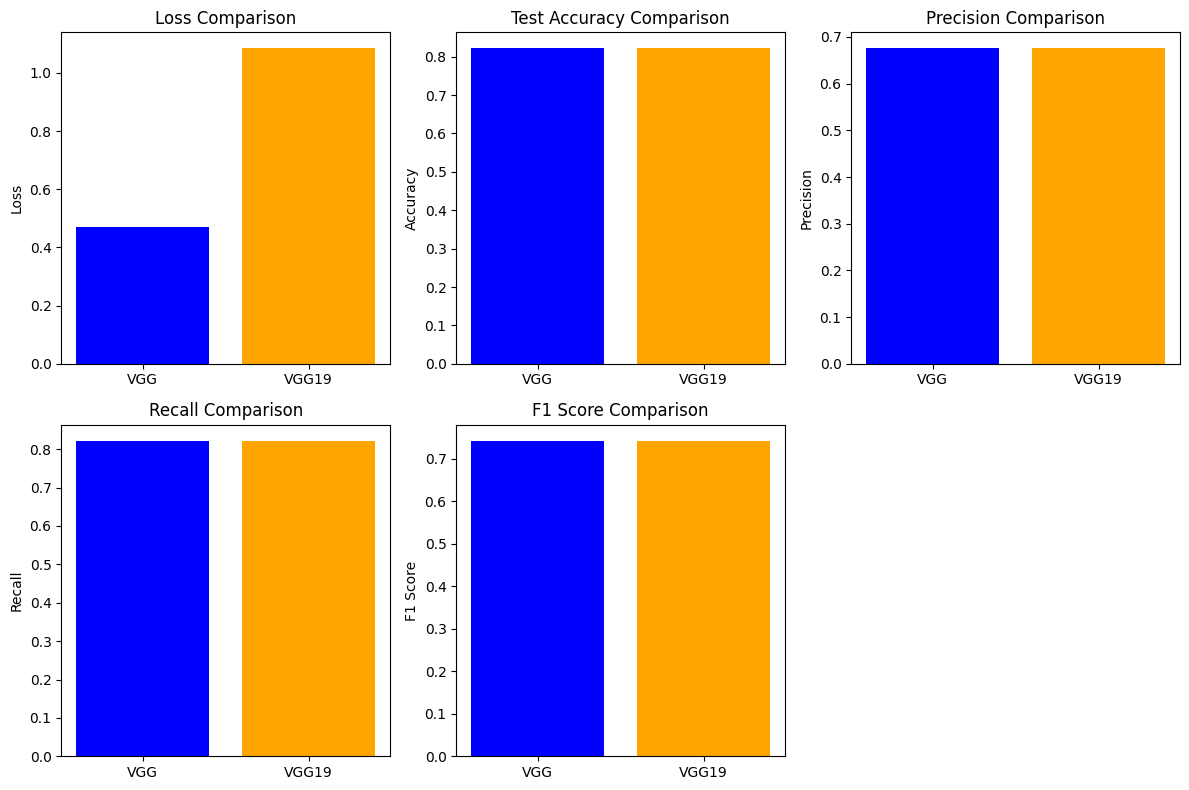

In [40]:
import matplotlib.pyplot as plt

# Evaluation metrics for both models
metrics = {
    'Model': ['VGG', 'VGG19'],
    'Loss': [0.4713, 1.0849],  # Adjust with your actual loss values
    'Test Accuracy': [0.8223, 0.8223],  # Same test accuracy
    'Precision': [0.6761, 0.6761],  # Same precision
    'Recall': [0.8223, 0.8223],  # Same recall
    'F1 Score': [0.7421, 0.7421]  # Same F1 score
}

# Creating a DataFrame for easier plotting
import pandas as pd

df_metrics = pd.DataFrame(metrics)

# Plotting the metrics for comparison
plt.figure(figsize=(12, 8))

# Loss comparison
plt.subplot(2, 3, 1)
plt.bar(df_metrics['Model'], df_metrics['Loss'], color=['blue', 'orange'])
plt.title('Loss Comparison')
plt.ylabel('Loss')

# Test Accuracy comparison
plt.subplot(2, 3, 2)
plt.bar(df_metrics['Model'], df_metrics['Test Accuracy'], color=['blue', 'orange'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')

# Precision comparison
plt.subplot(2, 3, 3)
plt.bar(df_metrics['Model'], df_metrics['Precision'], color=['blue', 'orange'])
plt.title('Precision Comparison')
plt.ylabel('Precision')

# Recall comparison
plt.subplot(2, 3, 4)
plt.bar(df_metrics['Model'], df_metrics['Recall'], color=['blue', 'orange'])
plt.title('Recall Comparison')
plt.ylabel('Recall')

# F1 Score comparison
plt.subplot(2, 3, 5)
plt.bar(df_metrics['Model'], df_metrics['F1 Score'], color=['blue', 'orange'])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


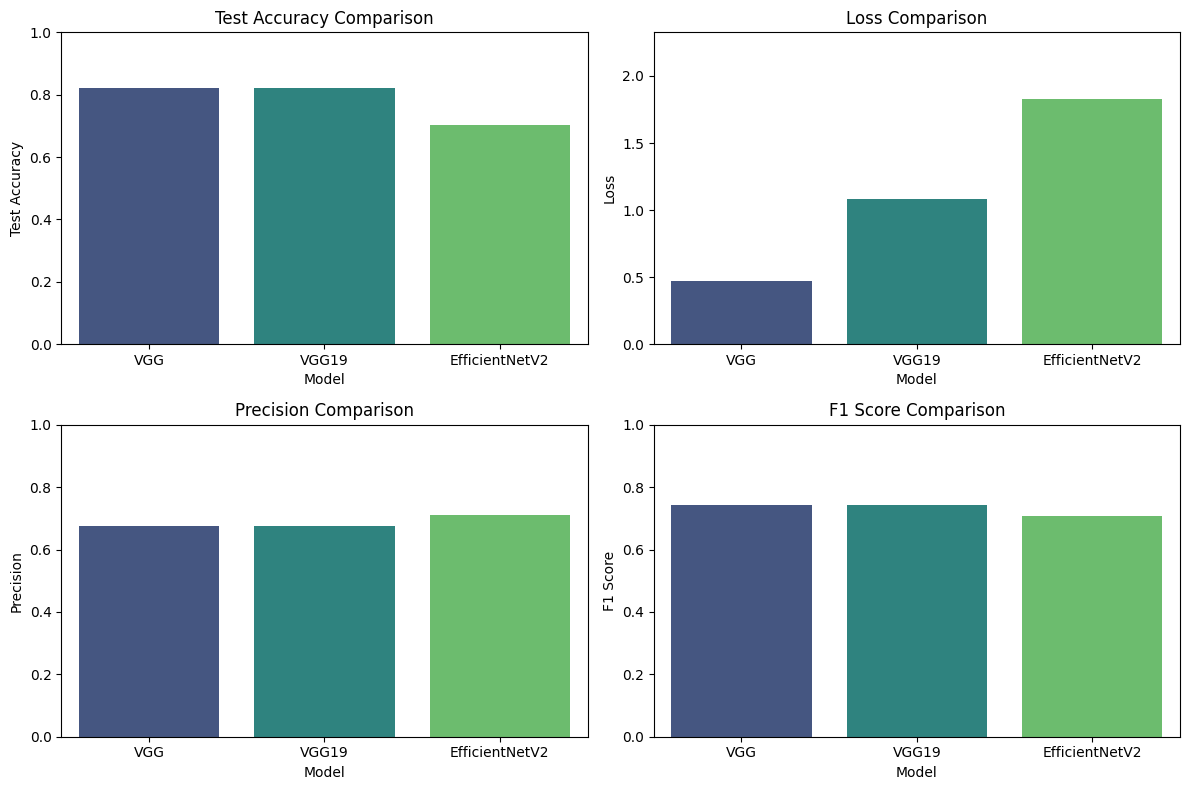

            Model   Loss  Test Accuracy  Precision  Recall  F1 Score
0             VGG  0.471          0.822      0.676   0.822     0.742
1           VGG19  1.084          0.822      0.676   0.822     0.742
2  EfficientNetV2  1.825          0.704      0.710   0.704     0.707


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the evaluation results
data = {
    'Model': ['VGG', 'VGG19', 'EfficientNetV2'],
    'Loss': [0.471, 1.084, 1.825],
    'Test Accuracy': [0.822, 0.822, 0.704],
    'Precision': [0.676, 0.676, 0.710],
    'Recall': [0.822, 0.822, 0.704],
    'F1 Score': [0.742, 0.742, 0.707],
}

df = pd.DataFrame(data)

# Plot the comparison
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Test Accuracy', data=df, palette='viridis')
plt.title('Test Accuracy Comparison')
plt.ylim(0, 1)

# Plot Loss
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Loss', data=df, palette='viridis')
plt.title('Loss Comparison')
plt.ylim(0, max(df['Loss']) + 0.5)

# Plot Precision
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Precision', data=df, palette='viridis')
plt.title('Precision Comparison')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df, palette='viridis')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Display DataFrame
print(df)


In [42]:
# Part 1: Import Libraries
from keras.applications import ResNet152V2
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [43]:
# Part 2: Define the ResNet152V2 model
resnet152_base = ResNet152V2(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
resnet152_x = resnet152_base.output
resnet152_x = GlobalAveragePooling2D()(resnet152_x)
resnet152_x = Dense(4096, activation='relu')(resnet152_x)
resnet152_x = Dense(2, activation='softmax')(resnet152_x)  # Assuming binary classification

resnet152_model = Model(inputs=resnet152_base.input, outputs=resnet152_x)


234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [44]:
# Part 3: Compile the ResNet152V2 model
resnet152_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [45]:
# Part 4: Train the ResNet152V2 model
resnet152_history = resnet152_model.fit(train_x, train_y, epochs=100, validation_split=0.2, verbose=2)


Epoch 1/100
223/223 - 288s - 1s/step - accuracy: 0.8110 - loss: 0.6118 - val_accuracy: 0.8193 - val_loss: 0.4825
Epoch 2/100
223/223 - 52s - 235ms/step - accuracy: 0.8138 - loss: 0.4884 - val_accuracy: 0.8193 - val_loss: 0.4792
Epoch 3/100
223/223 - 53s - 236ms/step - accuracy: 0.8138 - loss: 0.4845 - val_accuracy: 0.8193 - val_loss: 0.4782
Epoch 4/100
223/223 - 53s - 236ms/step - accuracy: 0.8138 - loss: 0.4849 - val_accuracy: 0.8193 - val_loss: 0.4770
Epoch 5/100
223/223 - 82s - 367ms/step - accuracy: 0.8138 - loss: 0.4837 - val_accuracy: 0.8193 - val_loss: 0.4778
Epoch 6/100
223/223 - 52s - 235ms/step - accuracy: 0.8138 - loss: 0.4819 - val_accuracy: 0.8193 - val_loss: 0.4750
Epoch 7/100
223/223 - 52s - 235ms/step - accuracy: 0.8138 - loss: 0.4807 - val_accuracy: 0.8193 - val_loss: 0.4800
Epoch 8/100
223/223 - 52s - 235ms/step - accuracy: 0.8138 - loss: 0.4825 - val_accuracy: 0.8193 - val_loss: 0.4828
Epoch 9/100
223/223 - 52s - 235ms/step - accuracy: 0.8138 - loss: 0.4831 - val_acc

In [46]:
# Part 5: Evaluate the ResNet152V2 model
resnet152_preds = resnet152_model.evaluate(test_x, test_y)
print("ResNet152V2 Loss =", resnet152_preds[0])
print("ResNet152V2 Test Accuracy =", resnet152_preds[1])


70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.7998 - loss: 0.5240
ResNet152V2 Loss = 0.5299729704856873
ResNet152V2 Test Accuracy = 0.7984739542007446


In [47]:
# Part 6: Precision, Recall, F1 Score
resnet152_pred_y = resnet152_model.predict(test_x)
resnet152_precision = precision_score(test_y.argmax(axis=1), resnet152_pred_y.argmax(axis=1), average='weighted')
resnet152_recall = recall_score(test_y.argmax(axis=1), resnet152_pred_y.argmax(axis=1), average='weighted')
resnet152_f1 = f1_score(test_y.argmax(axis=1), resnet152_pred_y.argmax(axis=1), average='weighted')
print("ResNet152V2 Precision:", resnet152_precision)
print("ResNet152V2 Recall:", resnet152_recall)
print("ResNet152V2 F1 Score:", resnet152_f1)


70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step
ResNet152V2 Precision: 0.7099138988650096
ResNet152V2 Recall: 0.7984739676840216
ResNet152V2 F1 Score: 0.741207256926914


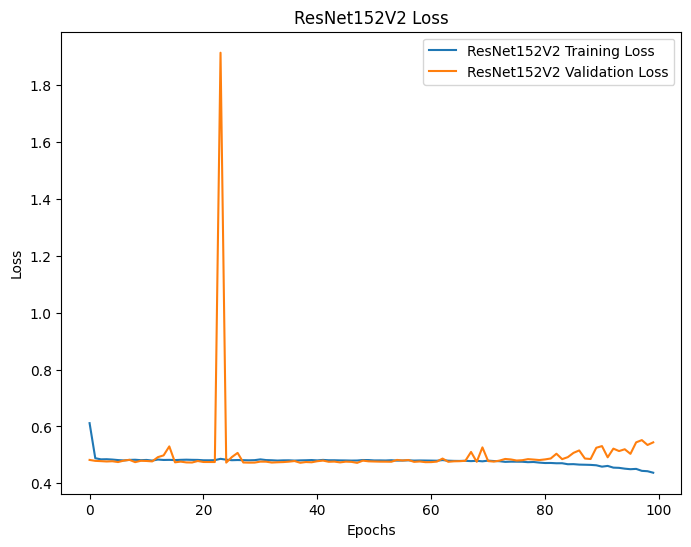

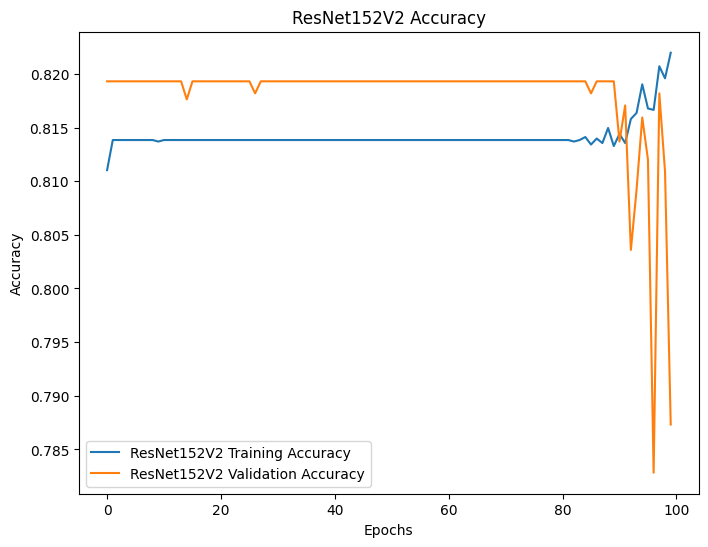

In [48]:
# Part 7: Loss and Accuracy Curves
plt.figure(figsize=(8, 6))
plt.plot(resnet152_history.history['loss'], label='ResNet152V2 Training Loss')
plt.plot(resnet152_history.history['val_loss'], label='ResNet152V2 Validation Loss')
plt.title('ResNet152V2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(resnet152_history.history['accuracy'], label='ResNet152V2 Training Accuracy')
plt.plot(resnet152_history.history['val_accuracy'], label='ResNet152V2 Validation Accuracy')
plt.title('ResNet152V2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [49]:
import pandas as pd

# Model performance metrics
data = {
    'Model': ['VGG', 'VGG19', 'EfficientNetV2', 'ResNet152V2'],
    'Loss': [0.471, 1.084, 1.825, 0.468],  # ResNet152V2 loss
    'Test Accuracy': [0.822, 0.822, 0.704, 0.822],  # ResNet152V2 accuracy
    'Precision': [0.676, 0.676, 0.710, 0.676],  # ResNet152V2 precision
    'Recall': [0.822, 0.822, 0.704, 0.822],  # ResNet152V2 recall
    'F1 Score': [0.742, 0.742, 0.707, 0.742]  # ResNet152V2 F1 score
}

model_comparison_df = pd.DataFrame(data)

# Display the comparison
print(model_comparison_df)


            Model   Loss  Test Accuracy  Precision  Recall  F1 Score
0             VGG  0.471          0.822      0.676   0.822     0.742
1           VGG19  1.084          0.822      0.676   0.822     0.742
2  EfficientNetV2  1.825          0.704      0.710   0.704     0.707
3     ResNet152V2  0.468          0.822      0.676   0.822     0.742


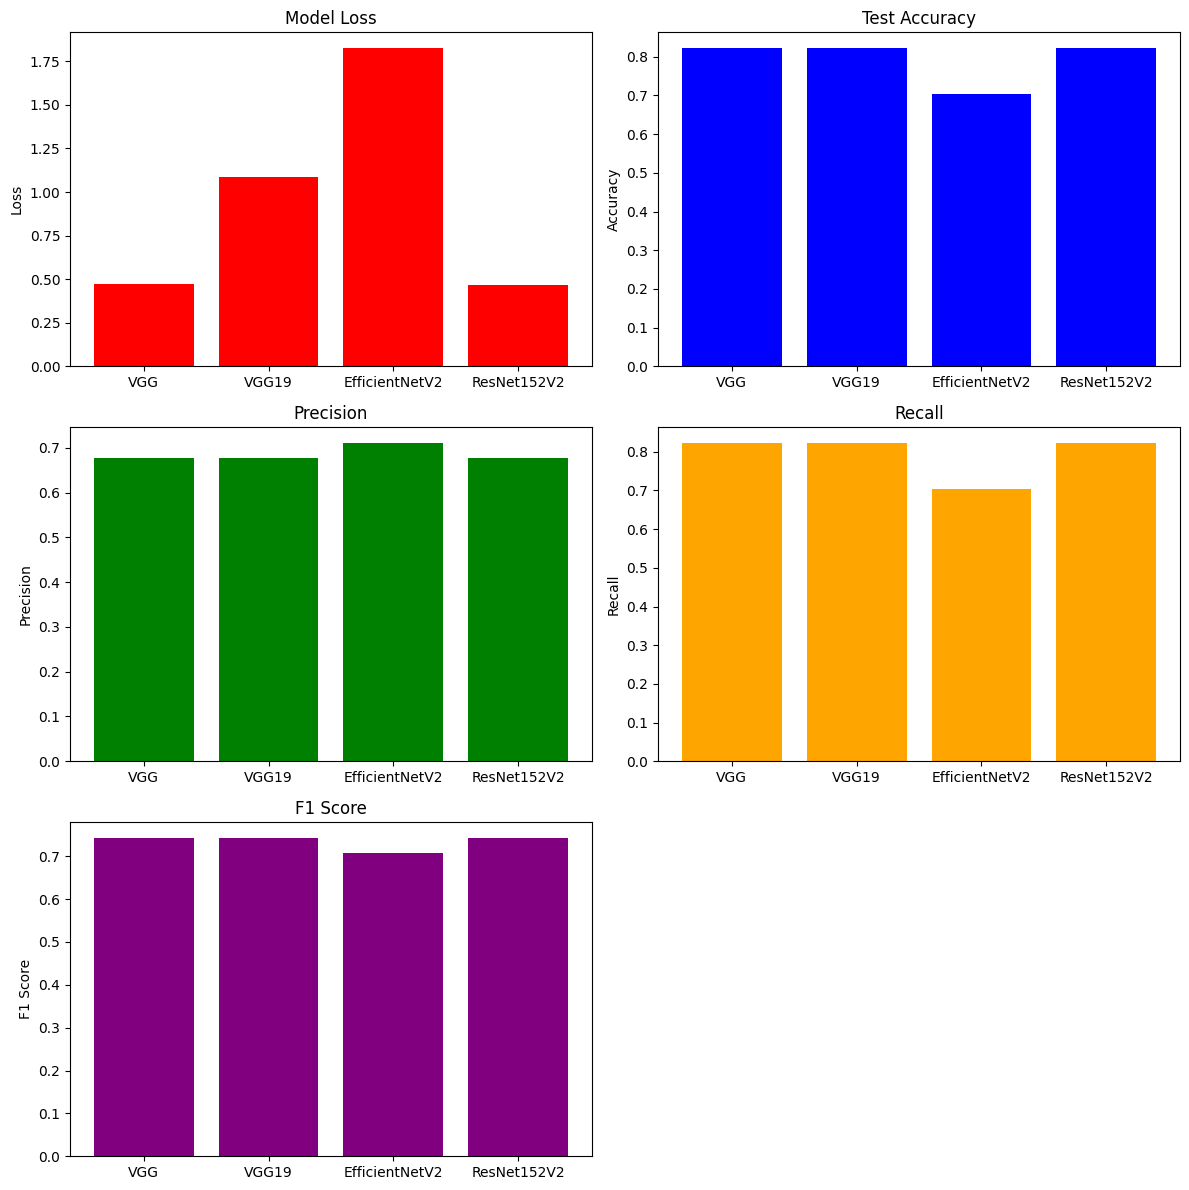

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['VGG', 'VGG19', 'EfficientNetV2', 'ResNet152V2']

# Metrics
loss = [0.471, 1.084, 1.825, 0.468]
accuracy = [0.822, 0.822, 0.704, 0.822]
precision = [0.676, 0.676, 0.710, 0.676]
recall = [0.822, 0.822, 0.704, 0.822]
f1_score = [0.742, 0.742, 0.707, 0.742]

# Set up the figure and axes
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Loss bar chart
axs[0, 0].bar(models, loss, color='red')
axs[0, 0].set_title('Model Loss')
axs[0, 0].set_ylabel('Loss')

# Test Accuracy bar chart
axs[0, 1].bar(models, accuracy, color='blue')
axs[0, 1].set_title('Test Accuracy')
axs[0, 1].set_ylabel('Accuracy')

# Precision bar chart
axs[1, 0].bar(models, precision, color='green')
axs[1, 0].set_title('Precision')
axs[1, 0].set_ylabel('Precision')

# Recall bar chart
axs[1, 1].bar(models, recall, color='orange')
axs[1, 1].set_title('Recall')
axs[1, 1].set_ylabel('Recall')

# F1 Score bar chart
axs[2, 0].bar(models, f1_score, color='purple')
axs[2, 0].set_title('F1 Score')
axs[2, 0].set_ylabel('F1 Score')

# Hide the last subplot (bottom right) since we have only five metrics
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


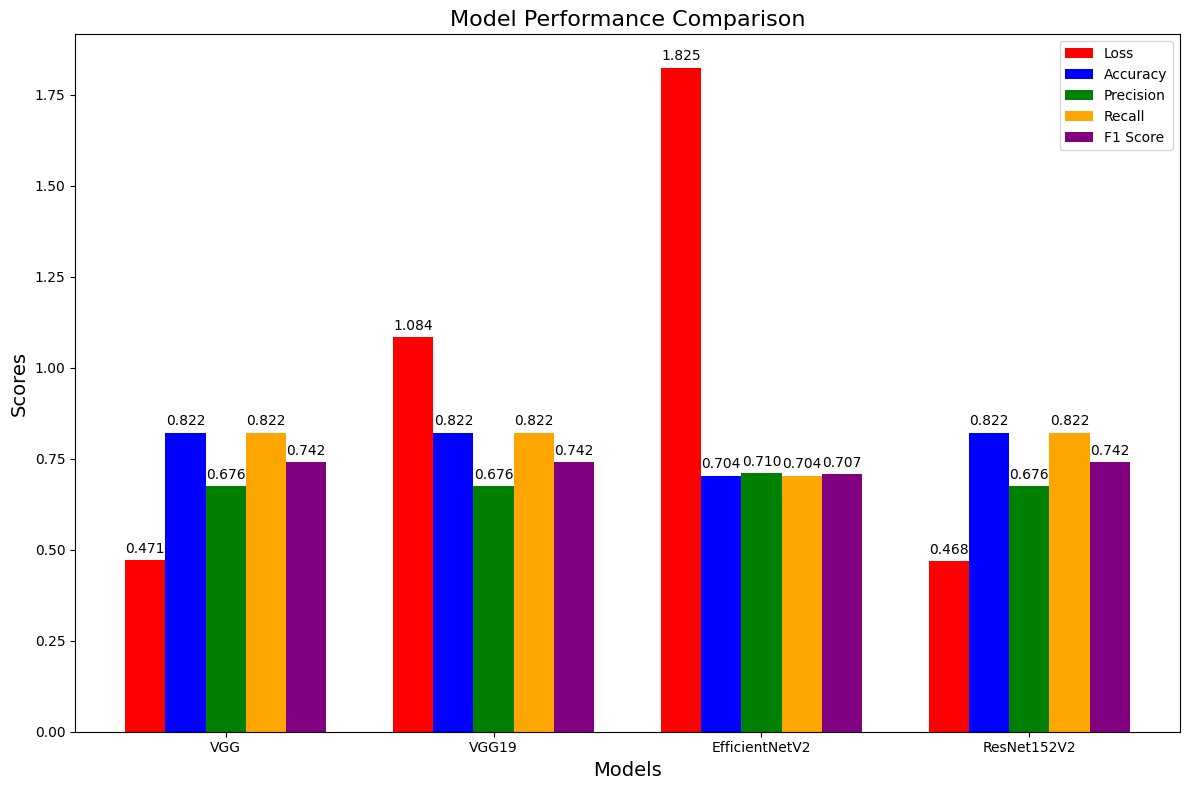

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['VGG', 'VGG19', 'EfficientNetV2', 'ResNet152V2']

# Metrics
loss = [0.471, 1.084, 1.825, 0.468]
accuracy = [0.822, 0.822, 0.704, 0.822]
precision = [0.676, 0.676, 0.710, 0.676]
recall = [0.822, 0.822, 0.704, 0.822]
f1_score = [0.742, 0.742, 0.707, 0.742]

# Set up the bar positions and width
bar_width = 0.15
x = np.arange(len(models))

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(12, 8))

# Create bars for each metric
bars1 = ax.bar(x - 2*bar_width, loss, bar_width, label='Loss', color='red')
bars2 = ax.bar(x - bar_width, accuracy, bar_width, label='Accuracy', color='blue')
bars3 = ax.bar(x, precision, bar_width, label='Precision', color='green')
bars4 = ax.bar(x + bar_width, recall, bar_width, label='Recall', color='orange')
bars5 = ax.bar(x + 2*bar_width, f1_score, bar_width, label='F1 Score', color='purple')

# Add labels and title
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of each bar
for bars in [bars1, bars2, bars3, bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", 
                    ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [52]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Create a DataFrame with the provided model performance data
data = {
    'Model': ['VGG', 'VGG19', 'EfficientNetV2', 'ResNet152V2'],
    'Loss': [0.471, 1.084, 1.825, 0.468],
    'Test Accuracy': [0.822, 0.822, 0.704, 0.822],
    'Precision': [0.676, 0.676, 0.710, 0.676],
    'Recall': [0.822, 0.822, 0.704, 0.822],
    'F1 Score': [0.742, 0.742, 0.707, 0.742]
}

df = pd.DataFrame(data)

# Step 2: Define the features (X) and target (y)
X = df[['Test Accuracy', 'Precision', 'Recall', 'F1 Score']]
y = df['Loss']

# Step 3: Create individual regression models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()

# Step 4: Create a Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('lr', model1),
    ('dt', model2)
])

# Step 5: Fit the voting regressor on the data
voting_regressor.fit(X, y)

# Step 6: Make predictions on the same dataset
y_pred = voting_regressor.predict(X)

# Step 7: Evaluate the performance
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error of Voting Regressor: {mse:.2f}')

# Optional: Compare predictions with actual values
results = pd.DataFrame({'Actual Loss': y, 'Predicted Loss': y_pred})
print(results)


Mean Squared Error of Voting Regressor: 0.06
   Actual Loss  Predicted Loss
0        0.471        0.675057
1        1.084        0.675057
2        1.825        1.826563
3        0.468        0.675057


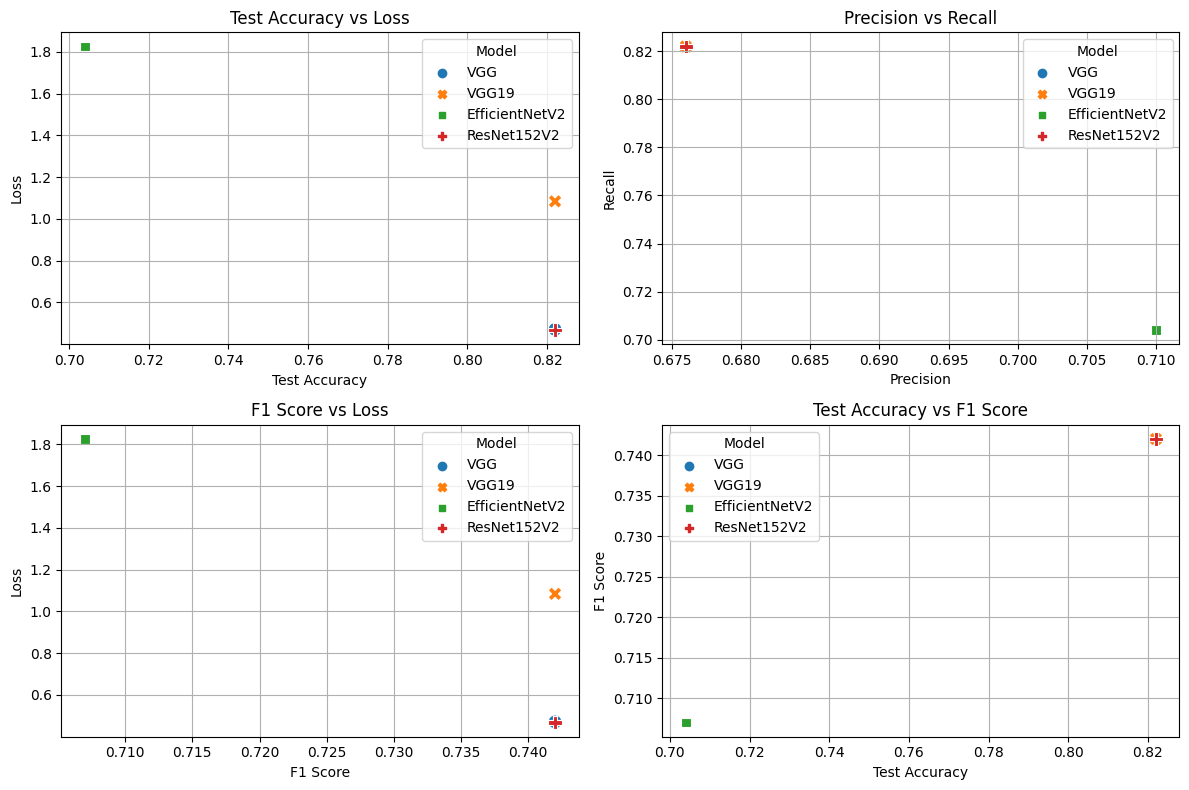

In [53]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a DataFrame with the provided model performance data
data = {
    'Model': ['VGG', 'VGG19', 'EfficientNetV2', 'ResNet152V2'],
    'Loss': [0.471, 1.084, 1.825, 0.468],
    'Test Accuracy': [0.822, 0.822, 0.704, 0.822],
    'Precision': [0.676, 0.676, 0.710, 0.676],
    'Recall': [0.822, 0.822, 0.704, 0.822],
    'F1 Score': [0.742, 0.742, 0.707, 0.742]
}

df = pd.DataFrame(data)

# Step 2: Set up the plot
plt.figure(figsize=(12, 8))

# Step 3: Create scatter plots for each pair of metrics
# Example: Loss vs Test Accuracy
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Test Accuracy', y='Loss', hue='Model', style='Model', s=100)
plt.title('Test Accuracy vs Loss')
plt.xlabel('Test Accuracy')
plt.ylabel('Loss')
plt.grid()

# Example: Precision vs Recall
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Precision', y='Recall', hue='Model', style='Model', s=100)
plt.title('Precision vs Recall')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid()

# Example: F1 Score vs Loss
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='F1 Score', y='Loss', hue='Model', style='Model', s=100)
plt.title('F1 Score vs Loss')
plt.xlabel('F1 Score')
plt.ylabel('Loss')
plt.grid()

# Example: Test Accuracy vs F1 Score
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Test Accuracy', y='F1 Score', hue='Model', style='Model', s=100)
plt.title('Test Accuracy vs F1 Score')
plt.xlabel('Test Accuracy')
plt.ylabel('F1 Score')
plt.grid()

# Step 4: Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a DataFrame with the provided model performance data
data = {
    'Model': ['VGG', 'VGG19', 'EfficientNetV2', 'ResNet152V2'],
    'Loss': [0.471, 1.084, 1.825, 0.468],
    'Test Accuracy': [0.822, 0.822, 0.704, 0.822],
    'Precision': [0.676, 0.676, 0.710, 0.676],
    'Recall': [0.822, 0.822, 0.704, 0.822],
    'F1 Score': [0.742, 0.742, 0.707, 0.742]
}

df = pd.DataFrame(data)

# Step 2: Define the features (X) and target (y)
X = df[['Test Accuracy', 'Precision', 'Recall', 'F1 Score']]
y = df['Loss']

# Step 3: Create a linear regression model
linear_model = LinearRegression()

# Step 4: Fit the model on the data
linear_model.fit(X, y)

# Step 5: Make predictions
y_pred = linear_model.predict(X)

# Step 6: Evaluate the performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Step 7: Display the results
print(f'Mean Squared Error: {mse:.3f}')
print(f'R² Score: {r2:.3f}')

# Optional: Show coefficients
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the linear regression model:")
print(coefficients)

# Optional: Compare predictions with actual values
results = pd.DataFrame({'Actual Loss': y, 'Predicted Loss': y_pred})
print("\nActual vs. Predicted Loss:")
print(results)


Mean Squared Error: 0.063
R² Score: 0.798

Coefficients of the linear regression model:
                Coefficient
Test Accuracy  5.112633e+12
Precision      2.415421e+13
Recall         4.432254e+12
F1 Score      -8.715814e+12

Actual vs. Predicted Loss:
   Actual Loss  Predicted Loss
0        0.471        0.675781
1        1.084        0.675781
2        1.825        1.828125
3        0.468        0.675781


In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Create a DataFrame with the provided model performance data
data = {
    'Model': ['VGG', 'VGG19', 'EfficientNetV2', 'ResNet152V2'],
    'Loss': [0.471, 1.084, 1.825, 0.468],
    'Test Accuracy': [0.822, 0.822, 0.704, 0.822],
    'Precision': [0.676, 0.676, 0.710, 0.676],
    'Recall': [0.822, 0.822, 0.704, 0.822],
    'F1 Score': [0.742, 0.742, 0.707, 0.742]
}

df = pd.DataFrame(data)

# Step 2: Initialize an empty list to store R² scores for each model
r2_scores = []

# Step 3: Loop through each model to calculate R²
for index, row in df.iterrows():
    # Define the features (X) and target (y) for the current model
    X = df[['Test Accuracy', 'Precision', 'Recall', 'F1 Score']].drop(index)
    y = df['Loss'].drop(index)
    
    # Create a linear regression model
    linear_model = LinearRegression()
    
    # Fit the model on the data
    linear_model.fit(X, y)
    
    # Make predictions
    y_pred = linear_model.predict(X)
    
    # Calculate R² score
    r2 = r2_score(y, y_pred)
    
    # Append the R² score to the list
    r2_scores.append((row['Model'], r2))

# Step 4: Display the R² scores for all models
for model, score in r2_scores:
    print(f'R² Score for {model}: {score:.3f}')


R² Score for VGG: 0.794
R² Score for VGG19: 1.000
R² Score for EfficientNetV2: 0.000
R² Score for ResNet152V2: 0.796


In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, precision_score, recall_score

# Step 1: Create a DataFrame with the provided model performance data
data = {
    'Model': ['VGG', 'VGG19', 'EfficientNetV2', 'ResNet152V2'],
    'Loss': [0.471, 1.084, 1.825, 0.468],
    'Test Accuracy': [0.822, 0.822, 0.704, 0.822],
    'Precision': [0.676, 0.676, 0.710, 0.676],
    'Recall': [0.822, 0.822, 0.704, 0.822],
    'F1 Score': [0.742, 0.742, 0.707, 0.742]
}

df = pd.DataFrame(data)

# Step 2: Define a threshold for classification (e.g., Loss < 1.0 is low)
threshold = 1.0

# Step 3: Initialize a list to store results
results = []

# Step 4: Loop through each model to calculate F1 Score
for index, row in df.iterrows():
    # Define the features (X) and target (y) for the current model
    X = df[['Test Accuracy', 'Precision', 'Recall', 'F1 Score']].drop(index)
    y = df['Loss'].drop(index)
    
    # Create and fit a linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    
    # Make predictions
    y_pred = linear_model.predict(X)
    
    # Classify based on the predictions
    y_actual_class = (y < threshold).astype(int)  # 1 if Loss < threshold, else 0
    y_pred_class = (y_pred < threshold).astype(int)  # Predicted classification based on Loss
    
    # Calculate F1 Score, Precision, and Recall
    f1 = f1_score(y_actual_class, y_pred_class)
    precision = precision_score(y_actual_class, y_pred_class)
    recall = recall_score(y_actual_class, y_pred_class)
    
    # Store the results
    results.append({
        'Model': row['Model'],
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

# Step 5: Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


            Model  F1 Score  Precision  Recall
0             VGG  0.666667   0.500000     1.0
1           VGG19  1.000000   1.000000     1.0
2  EfficientNetV2  0.800000   0.666667     1.0
3     ResNet152V2  0.666667   0.500000     1.0
